# Mean Maximum Discrepancy Two-sampole Test
#### Reference https://jmlr.csail.mit.edu/papers/v13/gretton12a.html

In [ ]:
import sys
sys.path.append("path/to/main_folder")

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from source.mmd import MMD

## generate some data with drift

In [3]:
# multivariate normal distribution parameters
mu_before = np.array([0, 0])
sigma_before = np.array([[1, 0], [0, 1]])
x_before = multivariate_normal.rvs(mean=mu_before, cov=sigma_before, size=500)
# generate new samples from a different distribution
mu_after = np.array([0, 0])
sigma_after = np.array([[1, 0], [0, 1]])
x_after = multivariate_normal.rvs(mean=mu_after, cov=sigma_after, size=500)

## set sigma and init MMD

In [ ]:
sigma = 1.0
mmd, mmd_perms, pval = MMD(x_before, x_after, sigma, n_permutations=1000)
print(f"MMD Statistic: {mmd}, p-value: {pval}")

MMD: -0.0014333357928930646, p-value: 0.895


## plot null distribution

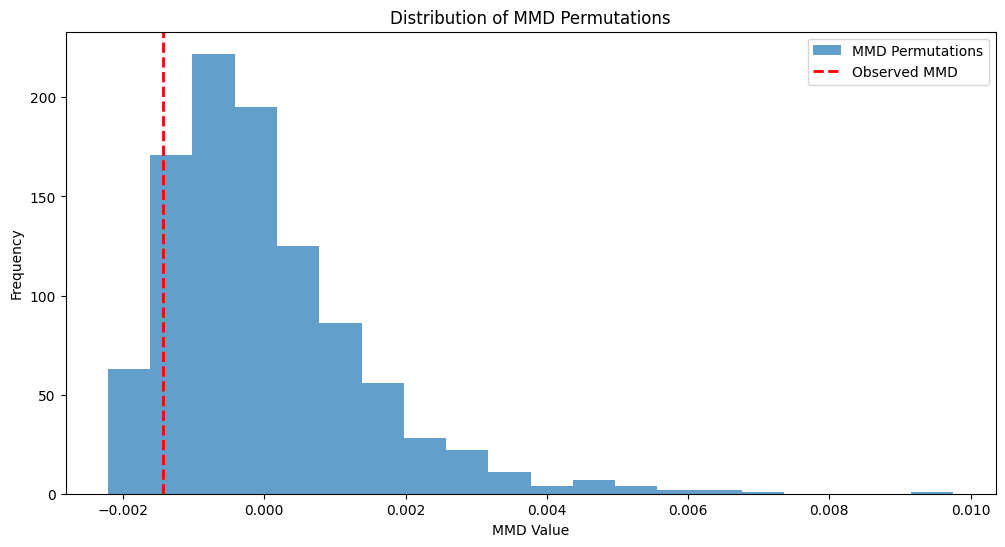

In [5]:
from source.utils import plot_mmd_null_distribution

plot_mmd_null_distribution(mmd_perms, mmd, output_path="imgs/mmd_null_distribution_nodrift.png")

## visually inspect bivariate drift

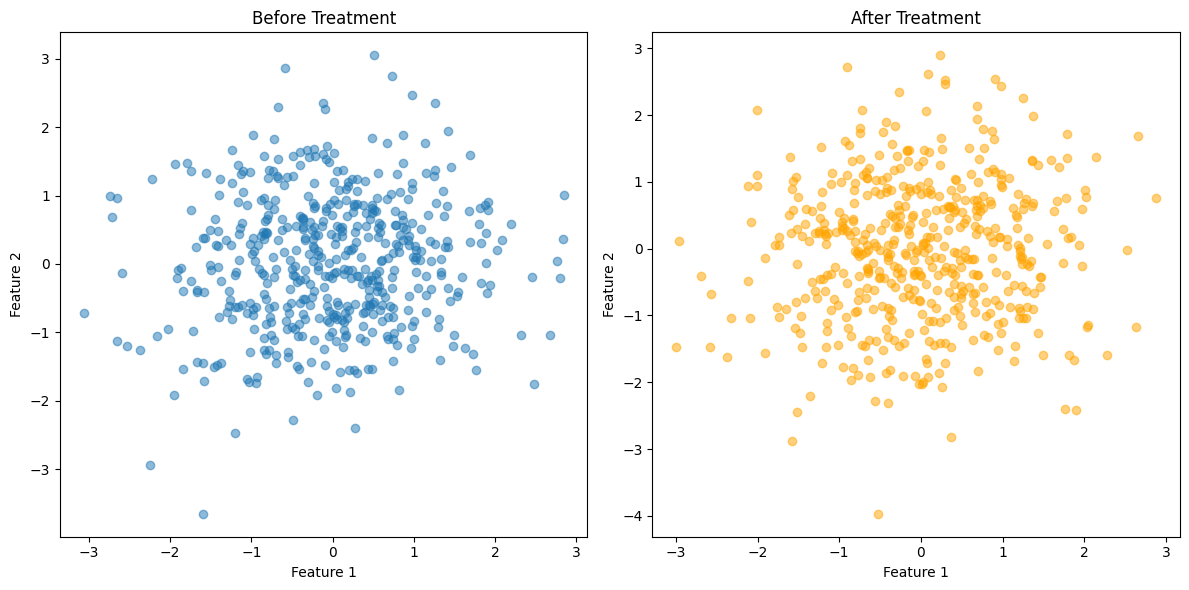

In [6]:
from source.utils import plot_bivariate_drift

plot_bivariate_drift(x_before, x_after, output_path="imgs/mmd_bivariate_drift_nodrift.png")

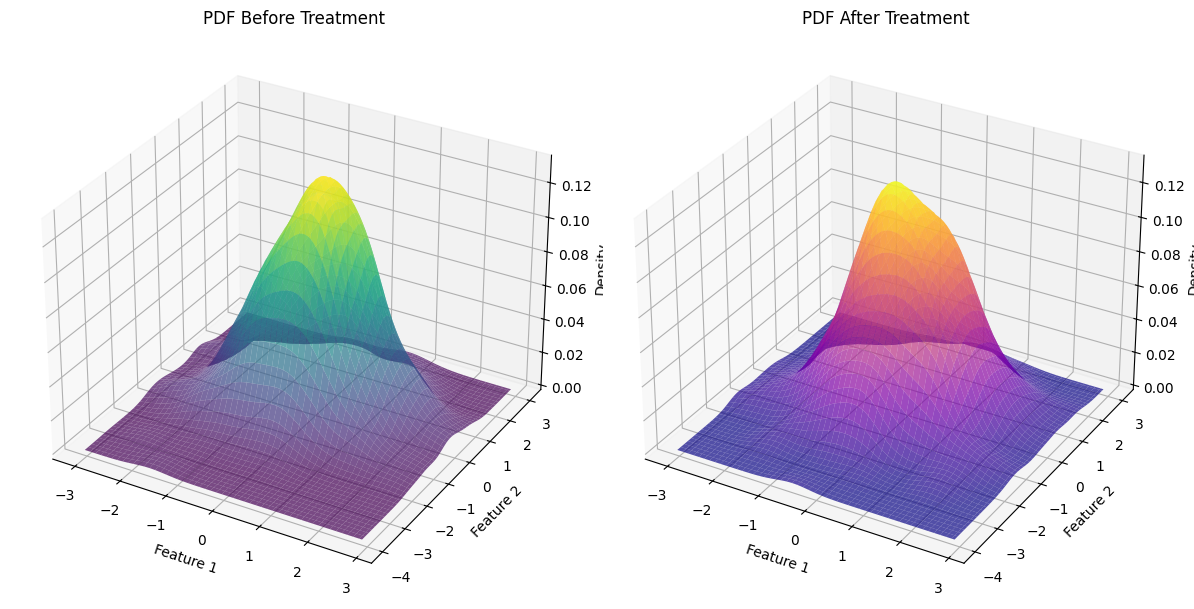

In [7]:
from source.utils import plot_pdf_drift

plot_pdf_drift(x_before, x_after, output_path="imgs/mmd_pdf_drift_nodrift.png")

# simulate drift

MMD: 0.18709878880053388, p-value: 0.0


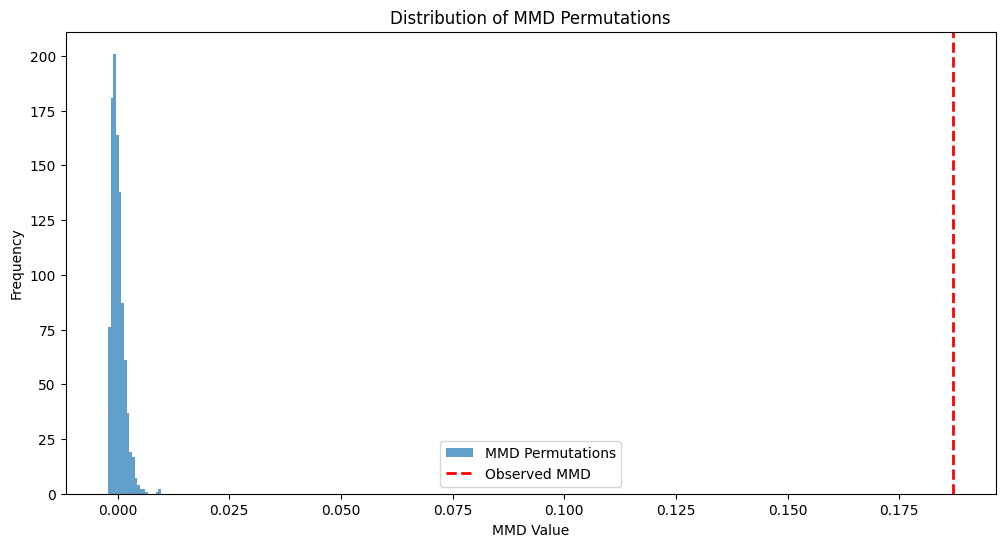

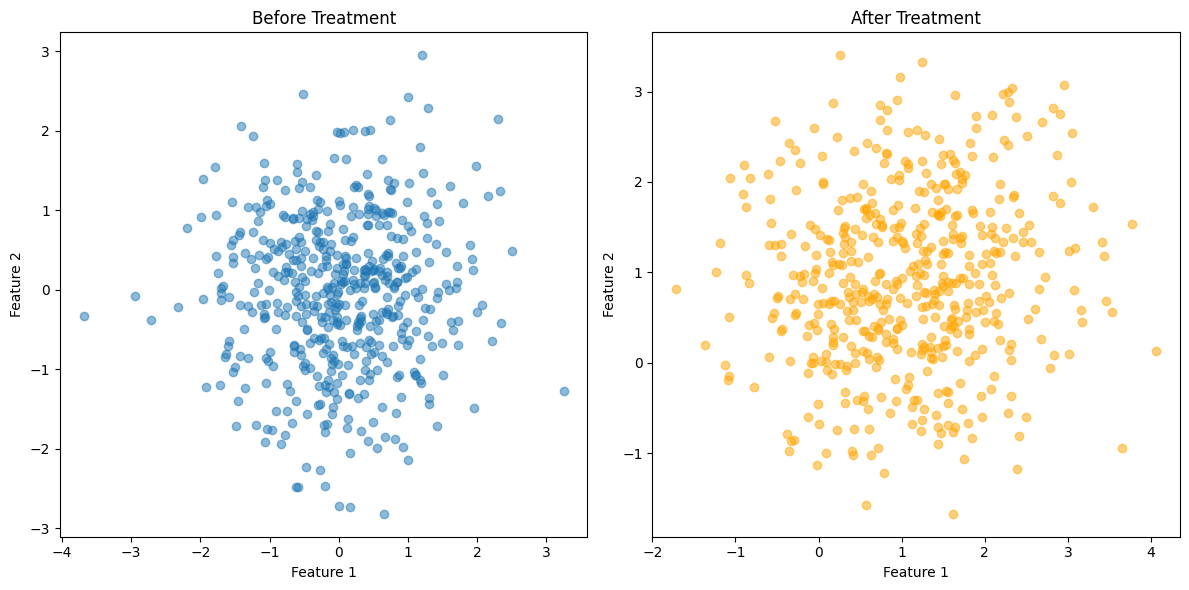

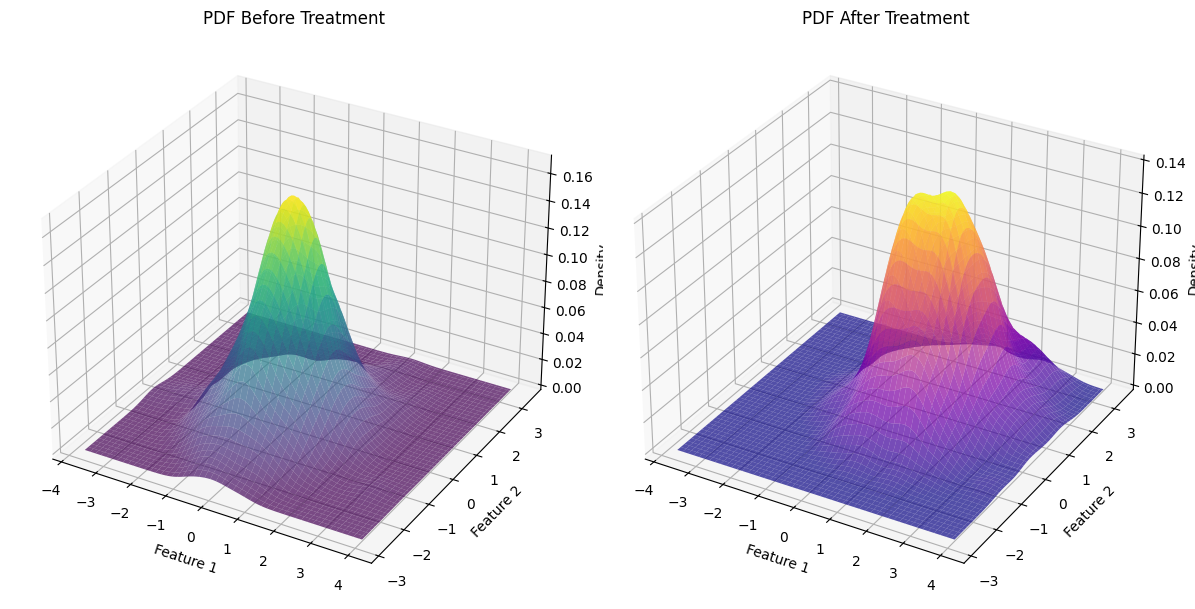

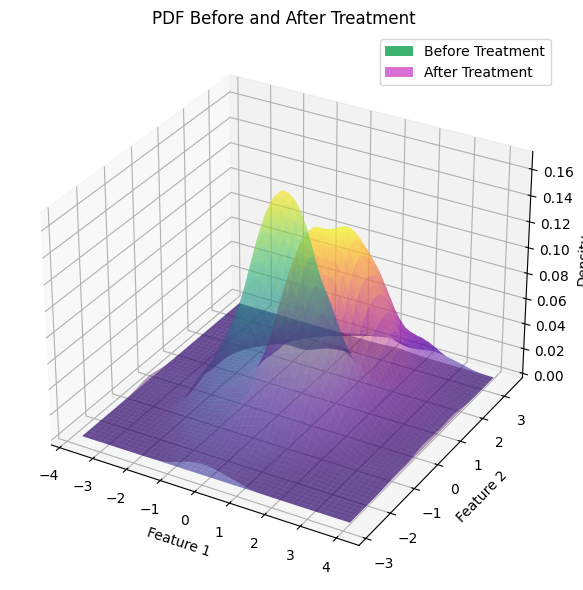

In [8]:
# Example with normal distribution with different means
mu_before = np.array([0, 0])
sigma_before = np.array([[1, 0], [0, 1]])
x_before = multivariate_normal.rvs(mean=mu_before, cov=sigma_before, size=500)
# generate new samples from a different distribution
mu_after = np.array([1, 1])
sigma_after = np.array([[1, 0], [0, 1]])
x_after = multivariate_normal.rvs(mean=mu_after, cov=sigma_after, size=500)

# Calculate MMD
sigma = 1.0
mmd, mmd_perms, pval = MMD(x_before, x_after, sigma, n_permutations=1000)
print(f"MMD: {mmd}, p-value: {pval}")

# Plot the null distribution and the observed MMD
plot_mmd_null_distribution(mmd_perms, mmd, output_path="imgs/mmd_null_distribution_drift.png")

# Plot the bivariate drift
plot_bivariate_drift(x_before, x_after, output_path="imgs/mmd_bivariate_drift_drift.png")

# Plot the PDF drift
plot_pdf_drift(x_before, x_after, output_path="imgs/mmd_pdf_drift.png", plot_overlap=True)